$$ L = \sigma T^4 $$

### Playing around with an example, Stefan–Boltzmann law

In [1]:
import numpy as np
import matplotlib.pyplot as plt
sigma = 5.67e-8
T = np.linspace(1, 100, 100)
#Introduce random error
error = 0.02*T * np.random.randn(100)
L = sigma * (T + error)**4

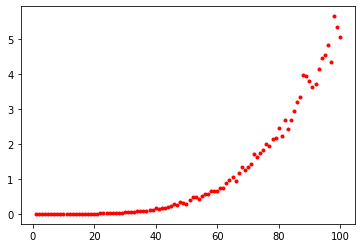

In [2]:
plt.plot(T, L, "r.")
plt.show()

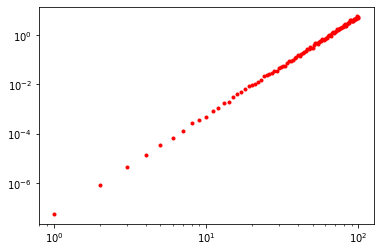

In [3]:
#Plot on the logarithmic axii
plt.loglog(T, L, "r.")
plt.show()
#Notice that when plotted on the log axii it almost looks like a straight
#line, indicating that a power law can be at play.

In [4]:
# a * T**B
lnT = np.log(T)
lnL = np.log(L)
b, lna = np.polyfit(lnT, lnL, 1)
#Get a by doing the opposite of a log, exp
a = np.exp(lna)
print(f'power = {b:.2f}, signma = {a:.2e}')

power = 4.00, signma = 5.63e-08


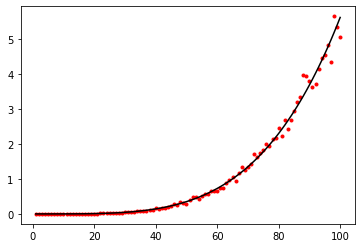

In [5]:
plt.plot(T, L, "r.")
plt.plot(T, a*T**b, "k-")

In [6]:
#More points toward the bottom left, therefore fit can completely miss.

In [7]:
import pandas as pd
import os

In [8]:
cwd = os.getcwd()
full_send = pd.read_csv(cwd + '/data/full_send.csv')

/var/folders/x7/bxm6vjsx0h5d8k1t86hztzt80000gn/T/ipykernel_46088/2791976689.py:2: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,25,26,27,28,31,36,37,38,40,41,42,45,46,47,48,50,51,52,53,56,57,60,61,63,66,69,70,71,72,73,77,78,79,85,88,91,92,93,94,99,100,101,102,105,106,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,129,130,131,132,133,134,135,140,141,145,146,147,148,152,158,160,164,165,166,168,173,174,175,176,177,178,179,180,181,182,183,184,185,189,190,192,193,194,195,198,203,204,205,207,208,209,212,213,214,215,217,218,219,220,223,224,227,228,230,233,236,237,238,239,245,246,247,248,249,250,251,252,253,254,255,256,257,261,262,264,265,266,267,270,275,276,277,279,280,281,284,285,286,287,289,290,291,292,295,296,299,300,302,305,308,309,310,311,313,314,316,318,319,320,323,324,325,326,328,329,330,331,334,335,338,339,341,344,346,347,348,349,353,354,356,357,358,359,362,367,368,375,376,377,378,379,380,381,382,383,384,385,386,387,391,392,394,395,396,397,400,405,406,40

In [9]:
full_send.dropna(subset=['seller_address'], inplace=True)
full_send.reset_index(inplace=True)

In [10]:
a = full_send['payment_token_decimals'][0]

In [11]:
b = full_send['total_price'][0]

In [12]:
b = int(b) / 10**a

In [13]:
float(b)

9.5

In [14]:
full_send['adj_price'] = full_send.apply(lambda row: int(row.total_price) / (10**row.payment_token_decimals), axis = 1)

In [15]:
full_send['adj_price'].head(10)

0    9.5000
1    1.7969
2    1.7690
3    9.4999
4    1.7950
5    1.7290
6    1.7280
7    1.5900
8    1.5900
9    1.5900
Name: adj_price, dtype: float64

In [35]:
full_send['adj_index'] = full_send['index'].reset_index()['level_0']

In [37]:
full_send['adj_index'].head()

0    0
1    1
2    2
3    3
4    4
Name: adj_index, dtype: int64

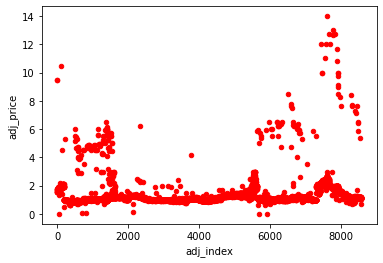

In [38]:
vis = full_send.plot.scatter('adj_index', 'adj_price', c='red')

In [79]:
vis.figure.savefig('full_send_indexvprice.pdf')

In [90]:
import powerlaw
data = full_send['adj_price']

In [91]:
fit = powerlaw.Fit(data)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [92]:
fit.power_law.alpha

4.530617949554053

In [93]:
fit.power_law.sigma

0.0390463356664447

In [94]:
fit.distribution_compare('power_law', 'exponential')

(1152.495493060489, 4.2783701679969927e-41)

In [112]:
data.value_counts(dropna=False).tail()

0.9500    1
0.9460    1
2.3800    1
0.9960    1
0.7203    1
Name: adj_price, dtype: int64

In [113]:
data.describe()

count    8578.000000
mean        1.307411
std         0.820464
min         0.000000
25%         0.997000
50%         1.100000
75%         1.289000
max        13.970000
Name: adj_price, dtype: float64

In [153]:
#finds that an nft transaction was for 0.0 ethereum?
zeros = np.where(data == 0)
abnorm = full_send.iloc[59, 60:120]

In [154]:
abnorm

asset_collection_opensea_buyer_fee_basis_points                                                   0.0
asset_collection_opensea_seller_fee_basis_points                                                250.0
asset_collection_payout_address                            0x9e7042da3a200a6dbfbfe7a8a48ee36d1fc2c731
asset_collection_require_email                                                                  False
asset_collection_short_description                                                                NaN
asset_collection_slug                                                            metacard-by-fullsend
asset_collection_telegram_url                                                                     NaN
asset_collection_twitter_username                                                                 NaN
asset_collection_instagram_username                                                       metacard.io
asset_collection_wiki_url                                                         

In [161]:
#Manually changing this just for now to play with, plot function will fail with divide by zero
data[59] = 0.1
data[59]

/var/folders/x7/bxm6vjsx0h5d8k1t86hztzt80000gn/T/ipykernel_37129/2397792645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[59] = 0.1


0.1

<AxesSubplot:>

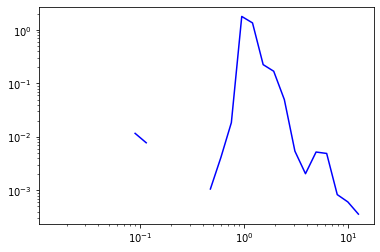

In [162]:
powerlaw.plot_pdf(data, color = 'b')